In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

### Step 1: Read the dataset

In [3]:

import pandas as pd
df = pd.read_csv('50_Startups.csv')
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Step 2: Perform basic data quality checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [6]:
df.duplicated().sum()

0

### Step 3: Seperate X(RND)andY(PROFIT)

In [7]:
X =df[['RND']]
Y= df[['PROFIT']]

In [8]:
X.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [9]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

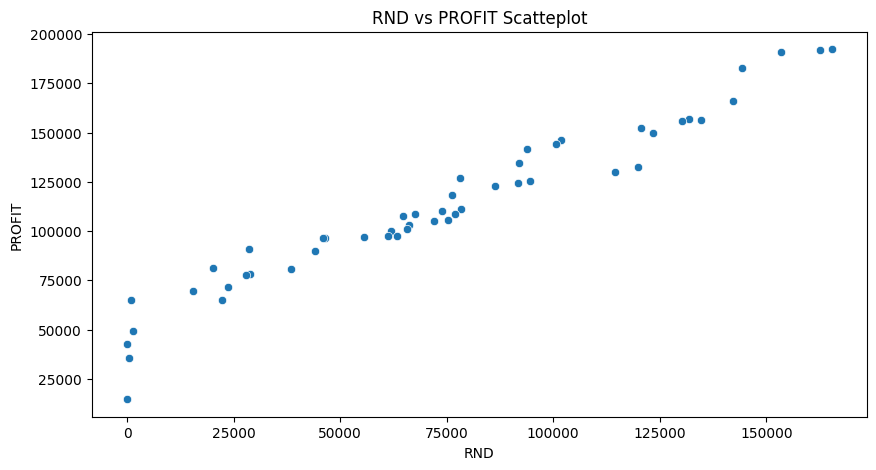

In [13]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='RND',y='PROFIT')
plt.title('RND vs PROFIT Scatteplot')
plt.show()

### Step 4: Build the Linear Regression Model

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [15]:
model.intercept_

array([49032.89914125])

In [16]:
model.coef_

array([[0.85429137]])

### Step 5: Evaluate the model

In [17]:
#R2 score
model.score(X, Y)

0.9465353160804393

In [18]:
# Estimated values of profit
ypred = model.predict(X)
ypred[0:5]

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032]])

In [19]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [20]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y, ypred)
print(f'Root Mean Squared Error:{mse:.2f}')

Root Mean Squared Error:85120931.33


In [23]:
rmse= mse**(1/2)
print(f'Root Mean Square Error : {rmse:2f}')

Root Mean Square Error : 9226.100548


In [24]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y, ypred)
print(f'Mean Absolute Error (MAP) : {mae:.2f}')

Mean Absolute Error (MAP) : 6910.98


In [25]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(Y,ypred)
print(f'Mean Absolute Percentage Error (MAPE) :{mape*100:.2f}%')

Mean Absolute Percentage Error (MAPE) :11.07%


In [26]:
from sklearn.metrics import r2_score
r2 = r2_score(Y, ypred)
print(f'R2 score : {r2:.4f}')

R2 score : 0.9465


### Because R2 score is 0.9456>0.8 it is very good model


### Visualizing straight line fit

In [27]:
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

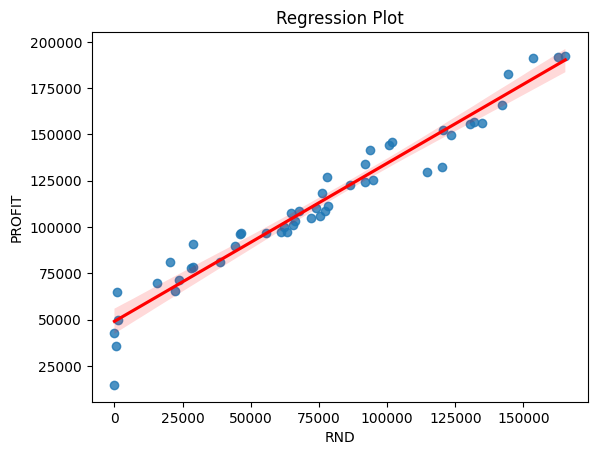

In [30]:
sns.regplot(data= df, x='RND', y='PROFIT', line_kws={'color':'red'})
plt.title('Regression Plot')
plt.show()